
# **Predictive Modeling of Physical Activity Status**

## **1. Overview**

---
## **Table of content**
* [Introduction](#1)
* [Preliminaries](#2)
* [Data acquisition](#3) 
* [Data Preprocessing](#4)
* [EDA](#5)
* [Hypothesis Testing](#6)
* [Predictive Modeling](#7)
* [Summary](#8)


## **1. Introduction** <a class="anchor"  id="1"></a>

The healthcare field is seeing an increasing number of applications for wearable technologies. According to the World Health Organisation, physical activity is any physical movement produced by skeletal muscles that require energy expenditure. It is estimated that 81% of today's youth and one in four adults do not exercise enough. Tracking daily physical activity will help one lead a healthy life. Some wearable devices and applications record fitness data and recommend general physical activities to stay healthy.

This study aims to develop such a physical activity monitoring system. Here, the Physical Activity Monitoring dataset is used to investigate the correlation between body movements and the type of physical activity performed. It contains data from 18 physical activities (such as walking, cycling and playing soccer ) performed by nine subjects wearing three inertial measurement devices (IMU) and a heart rate monitor.


## **2. Preliminaries**  <a class="anchor"  id="2"></a>
---

<font size="4">**2.1. Acceleration**</font>

Acceleration is defined as the rate of change of velocity over time. Accelerations are vector quantities. The direction of an object's acceleration is determined by the direction of the net force acting on the object. Triaxial accelerometers can measure acceleration in all three spatial axes. The readings along each axis depend on the orientation of the accelerometer and the direction of the force vector.

Lets assume that an accelerometer mounted on a point, P reads $a_{x}, a_{y}, a_{z}$  along the three axes, X,Y and Z.

Acceleration at P is $\vec{A} = a_{x}\hat{i}+ a_{y}\hat{j}+ a_{z}\hat{k}$ &emsp;where, $\hat{i},\hat{j},\hat{k}$ are unit vectors along X,Y and Z.

$A = \sqrt{a_{x}^{2}+a_{y}^{2}+a_{z}^{2}}$&emsp; gives the magnitude of the resultant acceleration.


<font size="4">**2.2. Angular velocity**</font>

Angular velocity measures the rate of change of the angular position of an object that is rotating or revolving relative to a point. The direction of angular velocity is perpendicular to the plane of rotation of the object. Angular velocity can be measured with a triaxial gyroscope.

$\vec{\omega} = \omega_{x}\hat{i}+ \omega_{y}\hat{j}+ \omega_{z}\hat{k}$ 

Magnitude of resultant, $\omega = \sqrt{\omega_{x}^{2}+\omega_{y}^{2}+\omega_{z}^{2}}$

<font size="4">**2.3 Magnetic field Intensity**</font>

Magnetic field intensity measures the strength and direction of the magnetic field at a point. Since it is a vector quantity, the calculation method for the resultant is the same as for angular velocity and acceleration. Magnetic field intensity can be measured with a magnetometer.


## **3. Data acquisition**  <a class="anchor"  id="3"></a>
---

The following parameters were monitored 

*   Heart rate 
*   Temperature (of hands, chest, and ankle)
*   Acceleration (of hands, chest, and ankle)
*   Angular velocity (of hands, chest, and ankle)
*   Magnetic field intensity (at hand, chest, and ankle levels)

Heart rate data was acquired at a sampling rate of 9 Hz, while all other data was acquired at 100 Hz.

## **4. Data Preprocessing**  <a class="anchor"  id="4"></a>

---
<font size="4">**4.1. Data Integration**</font>

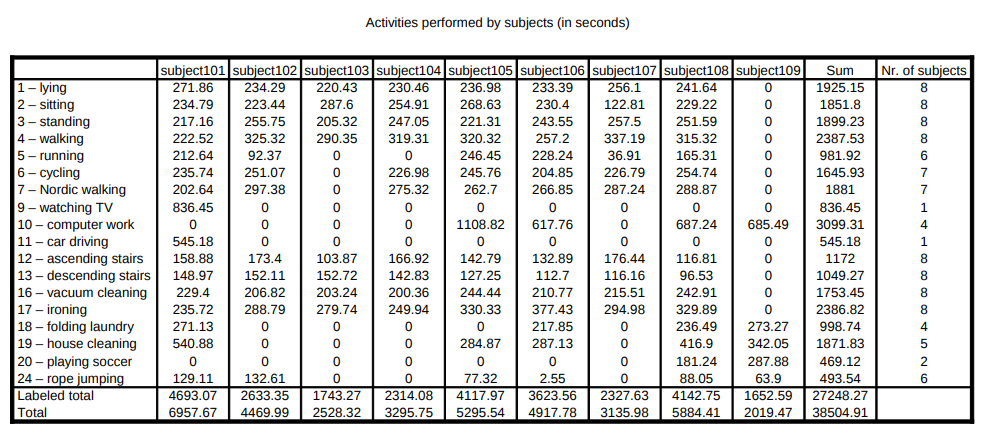

The table above gives an overview of the data being analysed. Data was collected from 9 subjects, each performing a specific subset of the 24 activities designated for the study. Each data set was exported separately into Jupyter Notebook and merged in the form of a Pandas data frame (**Table.2**)


<font size="4">**4.2. Data Cleaning**</font>

As can be seen from **Fig.1**, the highest number of NaN values (not a number) is associated with heart rate. This is due to the difference in sampling frequencies between the HR monitor and IMU. To address this, HR data was upsampled by linear interpolation. This is justified because the instantaneous variations in heart rate are not necessary for this study. NaN values associated with the other variables were discarded.

The following features are redundant for this study and were removed.
*   Transient data 
*   Orientation data (invalid as per documentation)
*   Second 3D-accelerometer data (invalid as per documentation)

<font size="4">**4.3. Data Transformation**</font>

The magnitude of the resultant of acceleration, angular velocity and magnetic field intensity was calculated for each data point and inserted into the data frame for analysis.

<font size="4">**4.4. Data Reduction**</font>

As shown in **Table 1**, each subject only performed a subset of the 24 available activities, and the duration of each activity varied among subjects. For example, subject 101 performed jumping rope for **129 seconds**, while subject 106 only performed it for **77 seconds**. To ensure the uniformity and randomness of the data, bootstraping was performed to obtain the mean values of random segments of the time series data for each variable.

<font size="3">**4.4.1 Bootstrapping**</font>

The data being considered is a time series, meaning it was collected over time, typically at regular intervals. One characteristic of time series data that is often important to consider is its tendency to exhibit serial dependence, meaning that the observations are not independent of one another. This can be due to a variety of factors, such as the physical process being measured, the sampling rate, or external influences.

When the observations in a time series are not independent, it can be problematic to use statistical methods that assume independence, such as complete random sampling. This is because such methods may not accurately capture the dependencies between observations, leading to biased or inconsistent results.

To address this issue, it is often recommended to use a re-sampling method that takes into account the dependencies between observations. One such method is simple block bootstrapping, which involves sampling contiguous blocks of observations from the original time series (see **ref 1**). This method preserves the dependencies between observations in the re-sampled data, making it a more appropriate choice for time series data that exhibits serial dependence.

The `bootstrap_time_series_generator` function performs the required operation. This function selects 500 random **60 secs** contiguous segments (i.e. 6000 data points, since the sampling frequency is **100 Hz** ) from the main data frame for each activity. It returns the mean values of all the variables for each **60 secs** segment. Different bootstrapped data frames were created for the EDA, hypothesis testing, and model training. **Table. 3** shows one such bootstrapped data-frame

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

#creating columns
IMU = ["temp","acc1_x","acc1_y", "acc1_z",
             "acc2_x","acc2_y", "acc2_z","gyro_x","gyro_y","gyro_z","magneto_x",
             "magneto_y","magneto_z","orient_1","orient_2","orient_3","orient_4",]
columns = ["timestamp", "activity_ID", "heart rate"]
for loc in ['hand', 'chest', 'ankle']:
    for data in IMU:
        columns.append(f'{loc} {data}')  

#importing all the data
df_list = []
for i in range(1,10):
        df_list.append(pd.read_csv(f'Protocol/subject10{i}.dat',names = columns, sep='\s+|\s+',engine='python'))
        

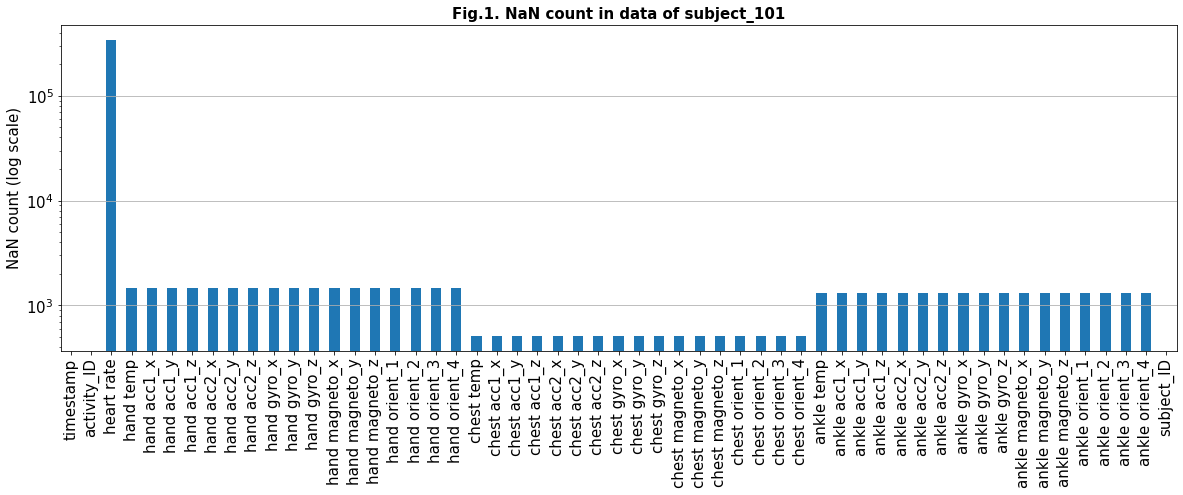

In [2]:
import seaborn as sns

for i in range(len(df_list)):
    df_list[i]['subject_ID'] = 101 + i #adding subject_IDs

#plotting Nan count for each variable
fig, ax = plt.subplots(figsize=(20,6))
df_list[0].isnull().sum().plot(kind = 'bar',ax = ax, logy = True , fontsize = 15)
plt.title('Fig.1. NaN count in data of subject_101',fontweight="bold", fontsize = 15)
ax.set_ylabel('NaN count (log scale)',fontsize = 15)
ax.grid( axis = 'y')
plt.style.use('seaborn-dark-palette')
plt.show()

In [3]:
"""Data frame creation and data cleaning happens here"""

# upsampling of heart rate data by interpolation
for i in range(len(df_list)):
    df_list[i]['heart rate'] = df_list[i]['heart rate'].interpolate(method = 'linear')
    
df = pd.concat(df_list, ignore_index = True) #merging all the data into a single data frame

#creating activities-column
activities = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

df['activity'] = df['activity_ID'].map(activities) #mapping activities by ID

df.insert(0, "subject_ID", df.pop("subject_ID"))
df.insert(1, "activity", df.pop("activity"))

columns.extend(["subject_ID", "activity_ID"])


#dropping the orientation variables
to_be_dropped = [column for column in columns if 'orient' in column or 'acc2' in column]
df1 = df.drop(columns= to_be_dropped , axis = 1)

#dropping all the remaining Nan values
df1 = df1.dropna()

#dropping transient activities
df1.drop(df1[df1['activity'] == 'transient'].index, inplace = True)
print('\033[1m  Table.2  Master data frame\033[0m')
df1.head(5)

  Table.2  Master data frame


,subject_ID,activity,timestamp,activity_ID,heart rate,hand temp,hand acc1_x,hand acc1_y,hand acc1_z,hand gyro_x,...,ankle temp,ankle acc1_x,ankle acc1_y,ankle acc1_z,ankle gyro_x,ankle gyro_y,ankle gyro_z,ankle magneto_x,ankle magneto_y,ankle magneto_z
2928,101,lying,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
2929,101,lying,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2930,101,lying,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
2931,101,lying,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
2932,101,lying,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


In [4]:
#print the number of NaN values remaining 
print(f'Total number of NaNs = {sum(list(df1.isna().sum()))}')

Total number of NaNs = 0


In [5]:
#data transformation happens here
def resultant(x , y, z):
    res = (x**2 + y**2 + z**2)**0.5
    return res

#adding all resultants to the the data frame
df1['hand gyro_res'] = resultant(df1['hand gyro_x'], df1['hand gyro_y'], df1['hand gyro_z'])
df1['chest gyro_res'] = resultant(df1['chest gyro_x'], df1['chest gyro_y'], df1['chest gyro_z'])
df1['ankle gyro_res'] = resultant(df1['ankle gyro_x'], df1['ankle gyro_y'], df1['ankle gyro_z'])
df1['hand acc_res'] = resultant(df1['hand acc1_x'] , df1['hand acc1_y'] , df1['hand acc1_z'])
df1['chest acc_res'] = resultant(df1['chest acc1_x'] , df1['chest acc1_y'] , df1['chest acc1_z'])
df1['ankle acc_res'] = resultant(df1['ankle acc1_x'] , df1['ankle acc1_y'] , df1['ankle acc1_z'])
df1['hand magneto_res'] = resultant(df1['hand magneto_x'] , df1['hand magneto_y'] , df1['hand magneto_z'])
df1['chest magneto_res'] = resultant(df1['chest magneto_x'] , df1['chest acc1_y'] , df1['chest acc1_z'])
df1['ankle magneto_res'] = resultant(df1['ankle magneto_x'] , df1['ankle acc1_y'] , df1['ankle acc1_z'])

In [6]:
import random
import math 
from collections import defaultdict

def bootstrap_time_series_generator(df, sample_size, activities, number_of_bootstraps, variables):
    """This function performs multiple bootstraps of a given data frame"""
    
    boot_frame = pd.DataFrame(columns= ['activity'] + variables) #data frame that stores all bootstraps
    index = 0
    for activity in activities:
        df2 = df1[df1['activity'] == activity].copy()
        df2 = df2.reset_index()
        if len(df2.index) == 0:
            continue
        else:
            for i in range(number_of_bootstraps):
                #generating a random number to represent the starting of a time-segment
                rind = random.randint(0, len(df2.index)- sample_size)
                alist = []
                for variable in variables: # looping for each variable
                    rand_time_segment = df2[variable][rind:rind+ sample_size]
                    alist.append(rand_time_segment.mean())#appends a random time segment
                boot_frame.loc[index] = [activity] + alist
                index+=1
    return boot_frame
        

In [87]:
import numpy as np

variables = list(np.delete(df1.columns.values, [0, 1, 2, 3])) # removes unwanted parameters such as subject ID, acivitty ID
activities = list(activities.values())
activities.remove('transient') # remove the transient activities
df_EDA = bootstrap_time_series_generator(df1, 6000, activities, 500, variables) # simple block bootstrap for EDA
df_HYP = bootstrap_time_series_generator(df1, 6000, activities, 500, variables) # simple block bootstrap for Hypothesis testing
print('\033[1m Table.3 Bootstrapped data frame for EDA \033[0m')
df_EDA.head(5)

 Table.3 Bootstrapped data frame for EDA 


,activity,heart rate,hand temp,hand acc1_x,hand acc1_y,hand acc1_z,hand gyro_x,hand gyro_y,hand gyro_z,hand magneto_x,...,ankle magneto_z,hand gyro_res,chest gyro_res,ankle gyro_res,hand acc_res,chest acc_res,ankle acc_res,hand magneto_res,chest magneto_res,ankle magneto_res
0,lying,64.437917,33.480156,4.684167,-0.163963,8.181947,-0.030577,0.017863,-0.026160,13.734872,...,-5.324873,0.130259,0.071589,0.069588,9.653466,9.486117,10.100580,48.205873,38.349506,19.752718
1,lying,62.012917,30.999469,0.458537,4.566542,8.593080,0.001107,0.000921,-0.007549,-5.581579,...,-6.733594,0.031378,0.037437,0.036474,9.742485,9.622794,10.071870,37.585530,36.511711,16.091198
2,lying,82.393379,34.076094,-1.013988,4.453939,5.441731,-0.012907,0.015631,0.001544,12.508038,...,-3.057766,0.297777,0.197296,0.205490,9.752270,9.630778,10.074319,43.611064,32.651685,26.532499
3,lying,72.621167,34.796698,0.802794,7.370361,6.175773,-0.001703,0.005470,-0.007059,-9.413079,...,-6.107402,0.063763,0.040780,0.037986,9.659068,9.507570,10.137074,35.094747,40.202889,17.345878
4,lying,78.938015,33.666948,6.852108,2.715477,6.235532,-0.003945,0.006943,-0.001434,7.129489,...,-4.188032,0.058769,0.052501,0.050008,9.666122,9.517441,10.110558,45.537867,32.128673,16.122085


## **5. Exploratory Data Analysis** * <a class="anchor"  id="5"></a>

---
The EDA aims to inspect features that can help classify the activities into groups and subgroups. 

<font size="4">**5.1. Analysis of HR data**</font>

**Fig.2** shows heart-rate (bpm) plotted against activities. The graph can be divided into three areas.

*   $60 bpm - 110 bpm$  : This range could be related to relaxed activities.
*   $110 bpm - 140 bpm$ : Could be related to mildly intense activities.
*   $140 bpm - 180 bpm$ :This range could apply to high intensity activities.

The 75th percentile for activities such as ironing, lying down, sitting, standing, and vacuuming is below the $110bpm$ line. Conversely, jumping rope and running, which are full-body exercises, are above $140bpm$. The results suggest that a primary level of classification could be made using the heart-rate data.

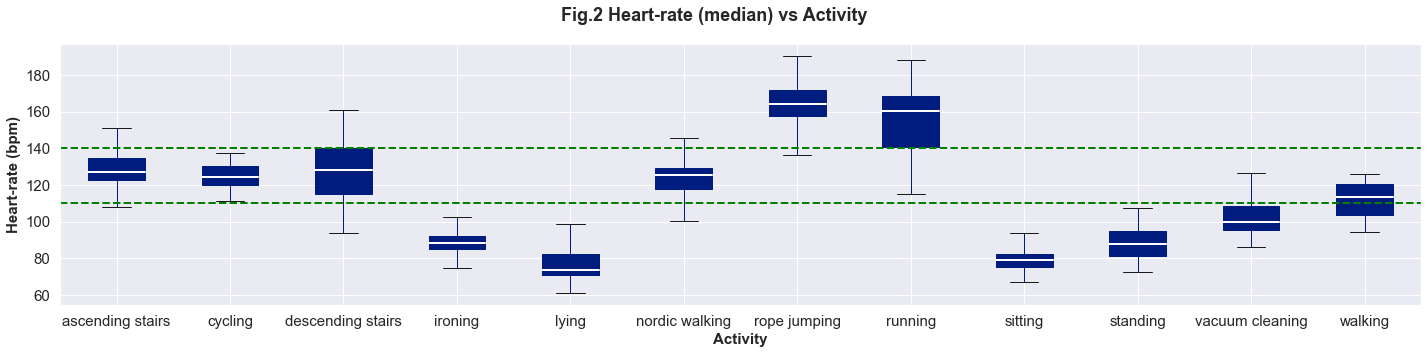

In [49]:
fig, ax = plt.subplots(figsize = (20,5))

medianprops = {'linestyle':'-', 'linewidth':2, 'color':'white'}
EDA_plot = df_EDA.boxplot(column = 'heart rate', ax=ax, by='activity',
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
EDA_plot.axhline(y=140, color= 'green', linewidth=2, linestyle = '--')
EDA_plot.axhline(y=110, color= 'green', linewidth=2, linestyle = '--')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

# Setting the values for all axes.
ax.set_xlabel('Activity',fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Heart-rate (bpm)',fontsize = 15, fontweight = 'bold')
ax.set_title('')
plt.style.use('seaborn-dark-palette')
fig.suptitle('Fig.2 Heart-rate (median) vs Activity', size = 18, fontweight = 'bold')
fig.tight_layout()

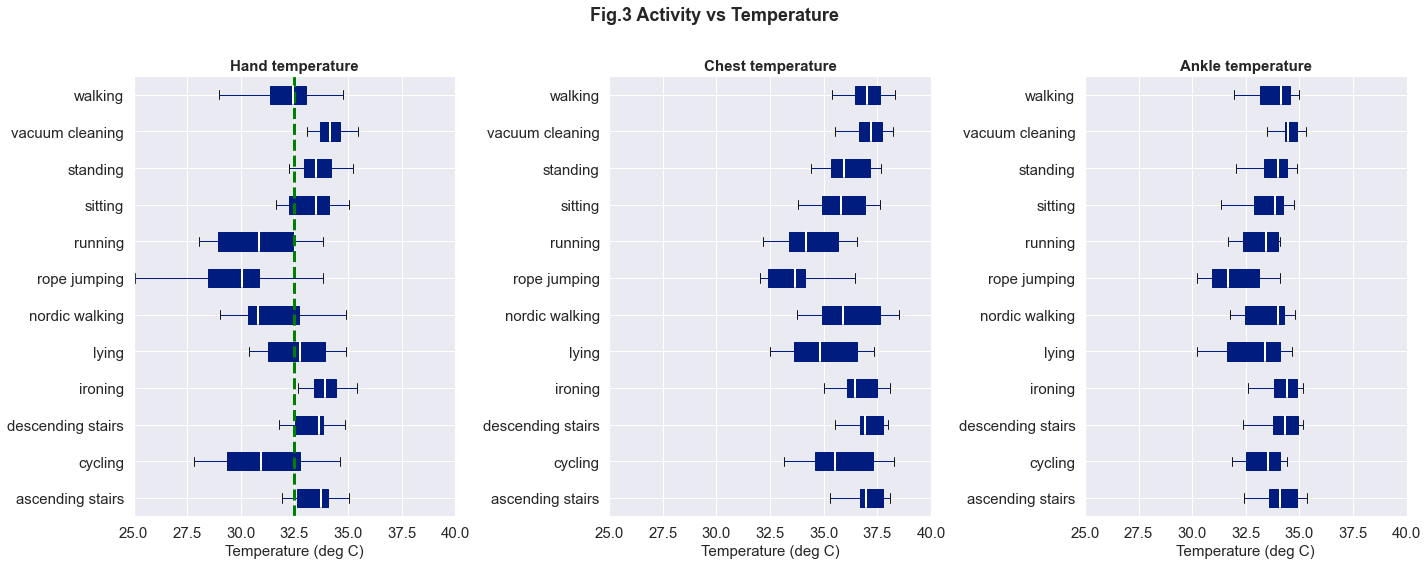

In [48]:
fig, ax = plt.subplots(1,3, figsize = (20,8))

medianprops = {'linestyle':'-', 'linewidth':2, 'color':'white'}

plot1 = df_EDA.boxplot(column = 'hand temp', ax=ax[0], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
df_EDA.boxplot(column = 'chest temp', ax=ax[1], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15,  showfliers = False)
df_EDA.boxplot(column = 'ankle temp', ax=ax[2], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15,  showfliers = False)

custom_xlim = (25, 40)

# Setting the values for all axes.
plt.setp(ax, xlim=custom_xlim)
for ax_i in ax:
    ax_i.set_xlabel('Temperature (deg C)',fontsize = 15)

plot1.axvline(x=32.5, color= 'green', linewidth=3,linestyle = '--')
ax[0].set_title('Hand temperature', size = 15, fontweight = 'bold')
ax[1].set_title('Chest temperature', size = 15, fontweight = 'bold')
ax[2].set_title('Ankle temperature', size = 15, fontweight = 'bold')
plt.style.use('seaborn-dark-palette')
fig.suptitle('Fig.3 Activity vs Temperature\n', size = 18, fontweight = 'bold')
fig.tight_layout()

<font size="4">**5.2. Analysis of temperature data**</font>

As shown in **Fig. 3**, the temperature recorded for each activity is plotted. It can be observed that activities conducted in open environments correspond to lower temperature values, and this trend is present across all three locations (hands, chest, and ankles). The effect is particularly noticeable for hand temperature. There is a rough separation between outdoor activities (such as cycling, jumping rope, nordic walking, and running) and indoor activities at a temperature of $32.5^\circ C$ for the hand temperature plot. This may be due to the cooling effect of airflow and convection on outdoor activities.


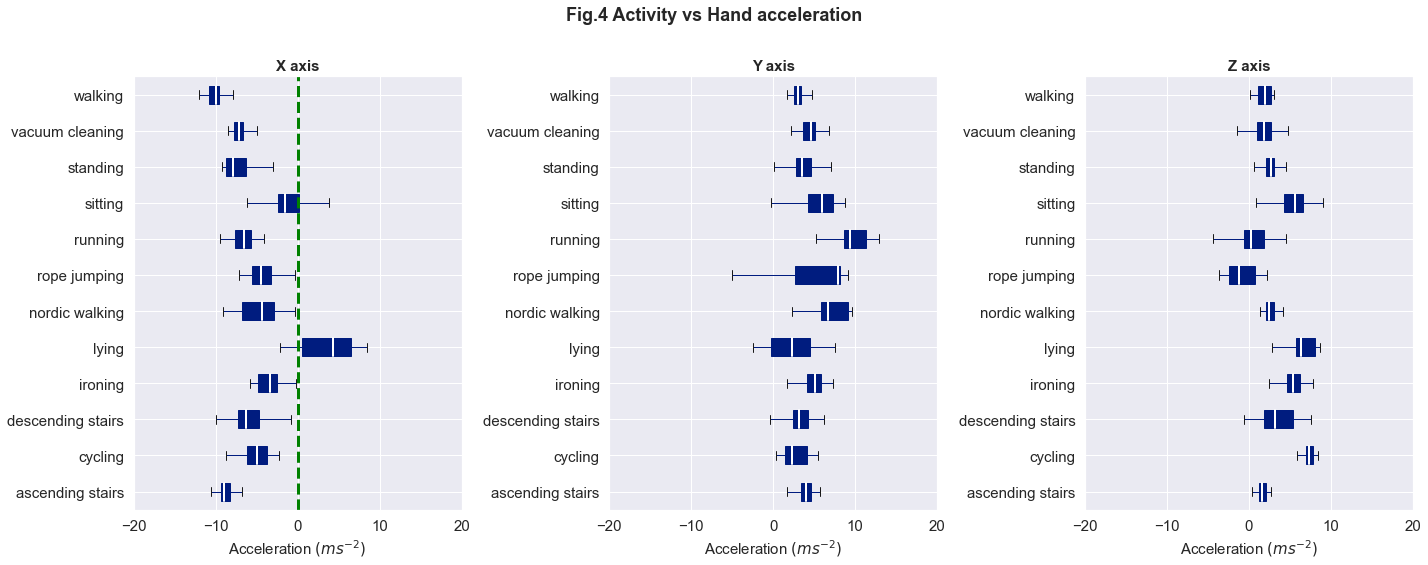

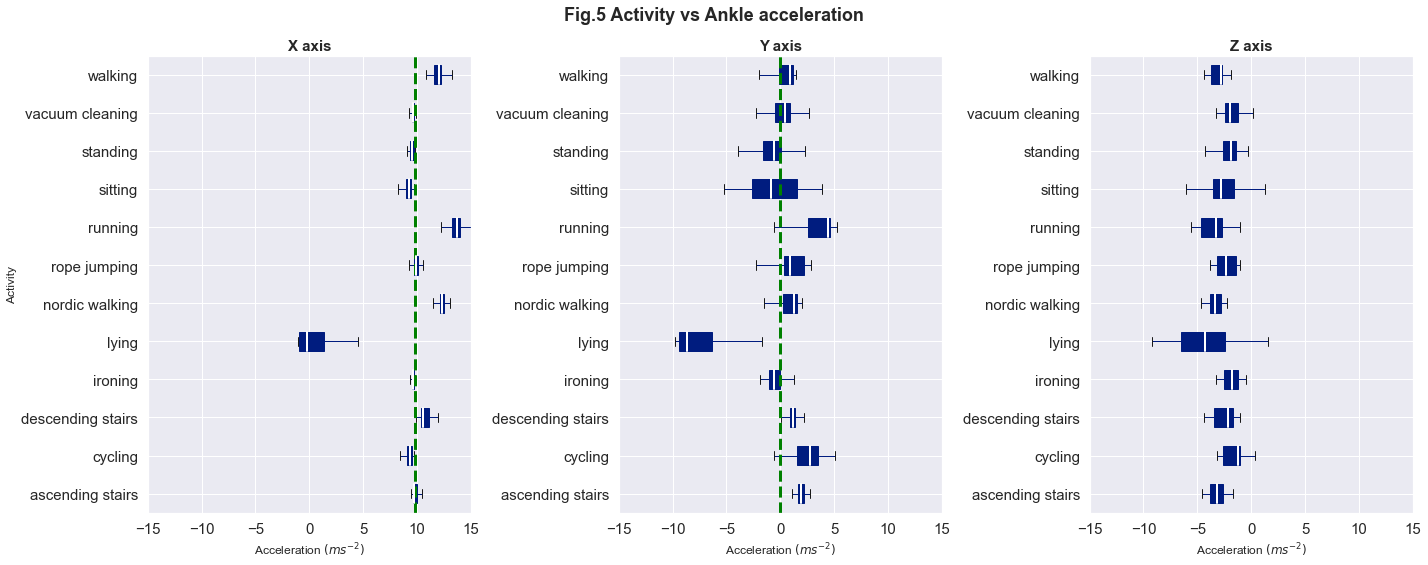

In [47]:
fig, ax = plt.subplots(1,3, figsize = (20,8))

medianprops = {'linestyle':'-', 'linewidth':2, 'color':'white'}
plot1 = df_EDA.boxplot(column = 'hand acc1_x', ax=ax[0], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
df_EDA.boxplot(column = 'hand acc1_y', ax=ax[1], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
df_EDA.boxplot(column = 'hand acc1_z', ax=ax[2], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)

custom_xlim = (-20, 20)
plot1.axvline(x=0, color= 'green', linewidth=3,linestyle = '--')

# Setting the values for all axes.
plt.setp(ax, xlim=custom_xlim)
for ax_i in ax:
    ax_i.set_xlabel('Acceleration $(ms^{-2})$',fontsize = 15)

ax[0].set_title('X axis', size = 15, fontweight = 'bold')
ax[1].set_title('Y axis', size = 15, fontweight = 'bold')
ax[2].set_title('Z axis', size = 15, fontweight = 'bold')
plt.style.use('seaborn-dark-palette')
fig.suptitle('Fig.4 Activity vs Hand acceleration\n', size = 18, fontweight = 'bold')
fig.tight_layout()


fig1, ax1 = plt.subplots(1,3, figsize = (20,8))
plot1 = df_EDA.boxplot(column = 'ankle acc1_x', ax=ax1[0], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
plot2 = df_EDA.boxplot(column = 'ankle acc1_y', ax=ax1[1], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
df_EDA.boxplot(column = 'ankle acc1_z', ax=ax1[2], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)

for ax_i in ax1:
    ax_i.set_xlabel('Acceleration $(ms^{-2})$')
custom_xlim = (-15, 15)

# Setting the values for all axes.
plt.setp(ax1, xlim=custom_xlim)

plot1.axvline(x=9.81, color= 'green', linewidth=3,linestyle = '--')
plot2.axvline(x=0, color= 'green', linewidth=3, linestyle = '--')

ax1[0].set_title('X axis', size = 15, fontweight = 'bold')
ax1[1].set_title('Y axis', size = 15, fontweight = 'bold')
ax1[2].set_title('Z axis', size = 15, fontweight = 'bold')

fig1.suptitle('Fig.5 Activity vs Ankle acceleration', size = 18, fontweight = 'bold')
ax1[0].set_ylabel('Activity')
fig1.tight_layout()

<font size="4">**5.3. Analysis of 3D-acceleration data**</font>

Except for lying down, all activities are performed in an upright body posture. The accelerometer data is expected to capture this difference. An accelerometer can output negative values, which means that the force vector is oriented opposite to the measurement axis.

The plot of ankle acceleration against activities (**Fig. 5**) shows that, for the X-axis, all activities except for lying down have a mean acceleration close to $10 m/s^2$. The case of lying down corresponds to $0 m/s^2$. The Y-axis shows the opposite trend. It is likely that the X-axis corresponds to the vertical direction for all activities except for lying down, as the acceleration due to gravity is approximately $10 m/s^2$. For the lying down case, the acceleration due to gravity is captured on the Y-axis.

When comparing ascending and descending stairs, it is expected that the vertical acceleration would be higher for the former, as ascending stairs requires working against gravity. This effect can be observed in the X-axis data of hand acceleration (**Fig. 4**) and ankle acceleration (**Fig. 5**). 

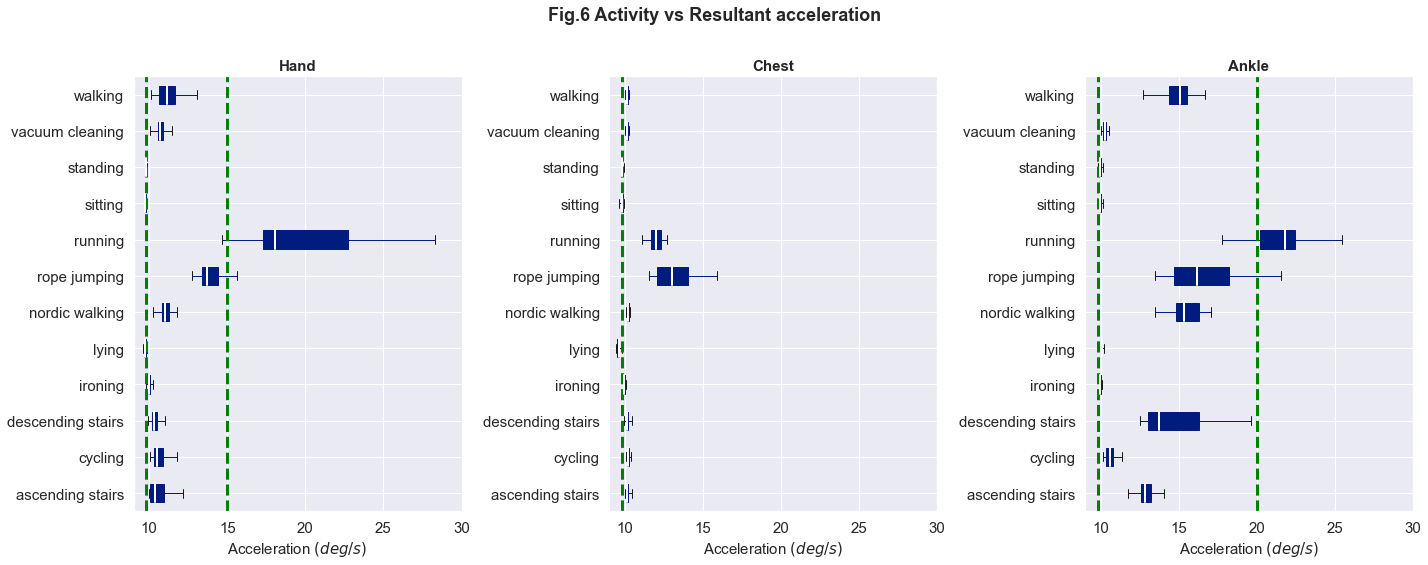

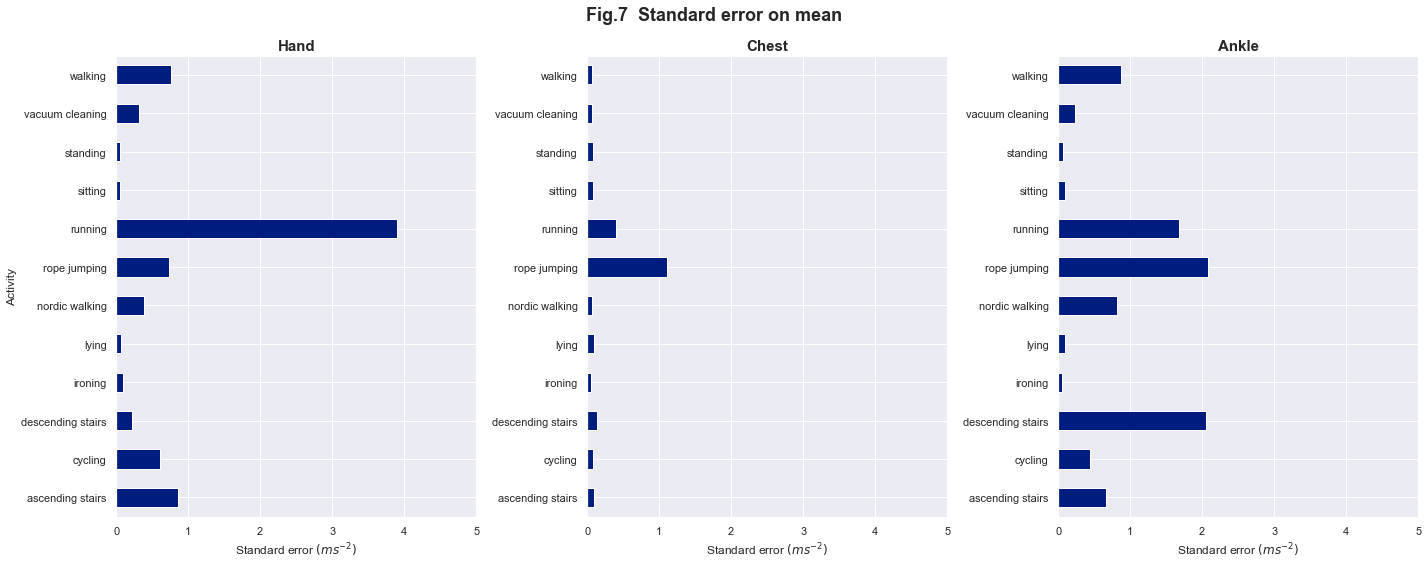

In [46]:
import warnings
warnings.filterwarnings('ignore')



fig1, ax1 = plt.subplots(1,3, figsize = (20,8))

medianprops = {'linestyle':'-', 'linewidth':2, 'color':'white'}
plot1 = df_EDA.boxplot(column = 'hand acc_res', ax=ax1[0], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
plot2 = df_EDA.boxplot(column = 'chest acc_res', ax=ax1[1], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
plot3 = df_EDA.boxplot(column = 'ankle acc_res', ax=ax1[2], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)


plot1.axvline(x=9.81, color= 'green', linewidth=3,linestyle = '--')
plot1.axvline(x=15, color= 'green', linewidth=3,linestyle = '--')
plot2.axvline(x=9.81, color= 'green', linewidth=3,linestyle = '--')
plot3.axvline(x=9.81, color= 'green', linewidth=3,linestyle = '--')
plot3.axvline(x=20, color= 'green', linewidth=3,linestyle = '--')

custom_xlim = (9, 30)

# Setting the values for all axes.
plt.setp(ax1, xlim=custom_xlim)
for ax_i in ax1:
    ax_i.set_xlabel('Acceleration $(deg/s)$',fontsize = 15)
#     plt.setp(ax, xlim=custom_xlim)

ax1[0].set_title('Hand', size = 15, fontweight = 'bold')
ax1[1].set_title('Chest', size = 15, fontweight = 'bold')
ax1[2].set_title('Ankle', size = 15, fontweight = 'bold')
plt.style.use('seaborn-dark-palette')
fig1.suptitle('Fig.6 Activity vs Resultant acceleration\n', size = 18, fontweight = 'bold')
fig1.tight_layout()


fig, ax = plt.subplots(1,3, figsize = (20,8))

df_EDA.groupby('activity')['hand acc_res'].std().plot.barh(ax=ax[0])
df_EDA.groupby('activity')['chest acc_res'].std().plot.barh(ax=ax[1])
df_EDA.groupby('activity')['ankle acc_res'].std().plot.barh(ax=ax[2])
ax[1].set_ylabel('')
ax[2].set_ylabel('')

custom_xlim = (0, 5)

for ax_i in ax:
    ax_i.set_xlabel('Standard error $(ms^{-2})$')
    plt.setp(ax, xlim=custom_xlim)

# Setting the values for all axes.

ax[0].set_title('Hand', size = 15, fontweight = 'bold')
ax[1].set_title('Chest', size = 15, fontweight = 'bold')
ax[2].set_title('Ankle', size = 15, fontweight = 'bold')

fig.suptitle('Fig.7  Standard error on mean', size = 18, fontweight = 'bold')
ax[0].set_ylabel('Activity')
fig.tight_layout()


For completely idle cases, the resultant acceleration is expected to be equal to 9.81$m/s^2$. Any variation from 9.81$m/s^2$ suggests the presence of physical activity. Compared to rope jumping, running is associated with the dynamic movement of hands and ankles, resulting in higher acceleration for the latter (**Fig.6**).

Standard error on the mean of resultant is a measure of the dynamic nature of acceleration. This could be why, stationary activities such as standing, sitting, lying and ironing all have near-zero standard error (**Fig.7**). 

<font size="4">**5.4. Analysis of angular velocity data**</font>

The mean angular velocity data appears to be spread out and able to differentiate between the various activities (as seen in **Fig. 8**), making it a useful feature for modeling purposes. Even activities with subtle differences, such as ironing and standing, appear to be distinguishable. Ironing and vacuum cleaning involve angular motion of the hands (and to some extent, the chest), while rope jumping and running can be distinguished from each other based on the ankle data. Overall, the angular velocity data seems to be effective at separating the activities from one another.

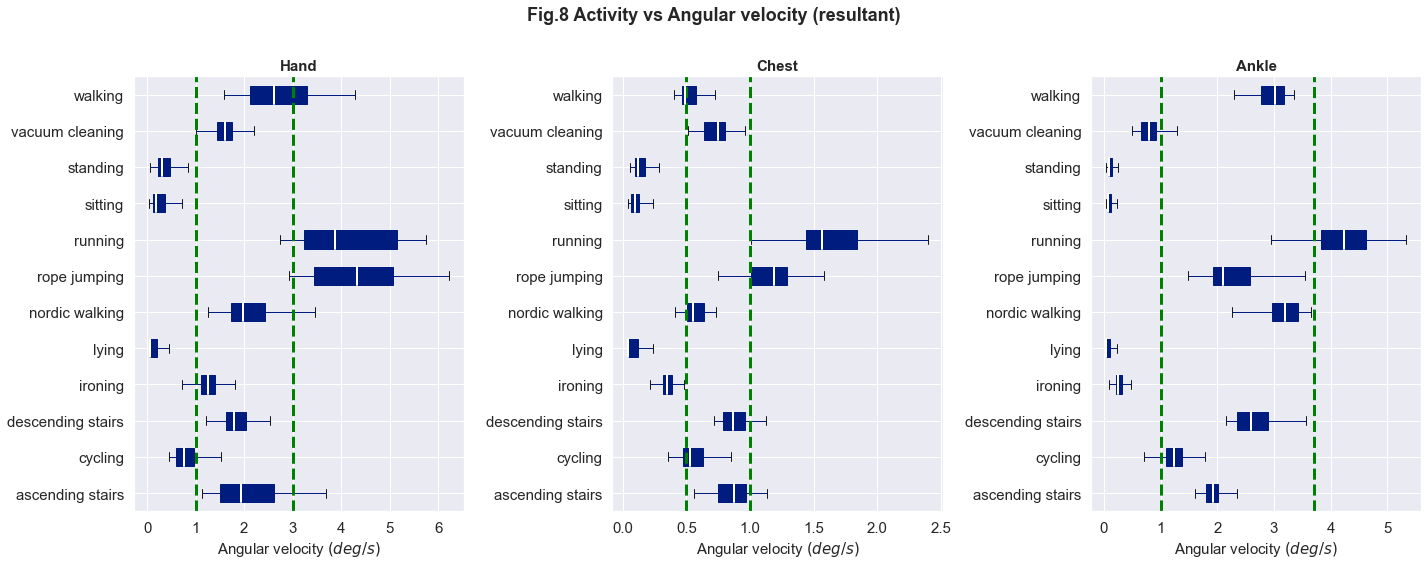

In [45]:
fig, ax = plt.subplots(1,3, figsize = (20,8))

medianprops = {'linestyle':'-', 'linewidth':2, 'color':'white'}
plot1 = df_EDA.boxplot(column = 'hand gyro_res', ax=ax[0], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
plot2 = df_EDA.boxplot(column = 'chest gyro_res', ax=ax[1], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)
plot3 = df_EDA.boxplot(column = 'ankle gyro_res', ax=ax[2], by='activity', vert = False,
               patch_artist = True, medianprops = medianprops, fontsize = 15, showfliers = False)

for ax_i in ax:
    ax_i.set_xlabel('Angular velocity $(deg/s)$',fontsize = 15)
    
plot1.axvline(x=1, color= 'green', linewidth=3,linestyle = '--')
plot1.axvline(x=3, color= 'green', linewidth=3,linestyle = '--')
plot2.axvline(x=0.5, color= 'green', linewidth=3,linestyle = '--')
plot2.axvline(x=1, color= 'green', linewidth=3,linestyle = '--')
plot3.axvline(x=1, color= 'green', linewidth=3,linestyle = '--')
plot3.axvline(x=3.7, color= 'green', linewidth=3,linestyle = '--')

ax[0].set_title('Hand', size = 15, fontweight = 'bold')
ax[1].set_title('Chest', size = 15, fontweight = 'bold')
ax[2].set_title('Ankle', size = 15, fontweight = 'bold')
plt.style.use('seaborn-dark-palette')
fig.suptitle('Fig.8 Activity vs Angular velocity (resultant)\n', size = 18, fontweight = 'bold')
fig.tight_layout()

## **6. Hypothesis testing**  <a class="anchor"  id="6"></a>

---
The hypothesis test aims to identify parameters that can distinguish activities from each other in a statistically significant way. Consider two activities, **A** and **B**. Let one parameter, **P**, be measured when **A** and **B** occur. Let $P_{a}$ and $P_{b}$ be the corresponding values of **P** during the occurrence of **A** and **B**, respectively.

The parameter **P** can distinguish between **A** and **B** if $P_{a}$ and $P_{b}$ are not equal.

**Null Hypothesis $H_{0}$** : $\mu_{P_{a}}=\mu_{P_{b}}$, or **P** cannot distinguish between **A** and **B** .

**Alternate Hypothesis $H_{a}$** : $\mu_{P_{a}}\neq\mu_{P_{b}}$, or **P** can distinguish between **A** and **B** .

where,  $\mu_{P_{a}}$ and $\mu_{P_{b}}$  are the mean values of $P_{a}$ and $P_{b}$ respectively. The two-tailed two sample Z-test was chosen as the type of test because it is suitable for comparing mean values and also because the number of samples is greater than 30.

**Z-score** = <font size="5">$\bar{X}(P_{a})-\bar{X}(P_{b})\over\sqrt{{\sigma^2_{Pa}\over n_{1}}+{\sigma^2_{Pb}\over n_{2}}}$</font>
    

$\bar{X}(P_{a})$ and $\bar{X}(P_{b})$ are estimators of $\mu_{P_{a}}$ and $\mu_{P_{b}}$.

<font size="5">${\sigma_{Pa}\over\sqrt{n_{1}}},{\sigma_{Pa}\over\sqrt{n_{1}}}$ </font> are  the standard deviations of the sampling distribution of the respective means.

The standard deviation of the bootstrap samples, also known as the bootstrap standard error, is an estimate of the standard deviation of the sampling distribution of the mean. For the purpose of hypothesis testing, the `p_values` function uses the bootstrapped data in `df_HYP` to calculate and return the p values.


In [14]:
from scipy import stats

def p_values(df, activity1, activity2, variables): 
    """This function calculates z-scores and p values"""
    
    p_frame = pd.DataFrame(columns= [''] + variables)
    alist = []
    for variable in variables:
        df1 = df[df['activity'] == activity1]
        df2 = df[df['activity'] == activity2]
        
        mean1 = df1[variable].median() #takes the median of all mean values 
        std_err1 = df1[variable].std() #computes the standard deviation of the bootstrap samples
        
        mean2 = df2[variable].median() #takes the median of all mean values 
        std_err2 = df2[variable].std() #computes the standard deviation of the bootstrap samples
        
        z_score = (mean1-mean2)/np.sqrt(std_err1**2+std_err2**2)
        p_value = round(stats.norm.sf(abs(z_score))*2*100,2) # p-value in percentage
        alist.append(str(p_value)+'%')
    p_frame.loc[0] = ['p-value'] + alist
    p_frame = p_frame.set_index('')
    return p_frame


<font size="4">**6.1. Can the heart rate data distinguish between sitting and standing?**</font>

**Null hypothesis:** &ensp; Mean heart rate when sitting and standing are the same.

**Alternate hypothesis:**&ensp;  Mean heart rate when sitting and standing are significantly different.

In [16]:
# performing Z test
p_frame1 = p_values(df_HYP, 'sitting', 'standing',['heart rate'])
print('\033[1m Table.4 Test results\033[0m')
p_frame1

 Table.4 Test results


,heart rate
,
p-value,44.23%


The p-value obtained is 44.23% (**Table .4** ). This value fails both a 5% and 10% significance test, which means that there is little evidence against the null hypothesis. In other words, the null hypothesis cannot be rejected. The heart rate data is not significantly different in sitting and standing.

<font size="4">**6.2. Can the heart rate data distinguish between nordic walking and standing?**

**Null hypothesis:** &ensp; Mean heart rate when standing and nordic walking the same. 

**Alternate hypothesis:**&ensp;  Mean heart rate when standing and nordic walking are significantly different.

In [17]:
p_frame2 = p_values(df_HYP, 'nordic walking', 'standing',['heart rate'])
print('\033[1m Table.5 Test results\033[0m')
p_frame2 

 Table.5 Test results


,heart rate
,
p-value,0.58%


A p-value of 0.58%, implies that there is significant evidence for rejecting the null hypothesis. Heart rate when standing and nordic walking are significantly different, as observed in **Fig .2** of EDA. 

<font size="4">**6.3. Which parameter can distinguish between ascending and descending stairs?**
 
Three parameters were considered for this hypothesis test. 
*   Resultant of acceleration at hands
*   Resultant of acceleration at ankles
*   Resultant of angular velocity at ankles
    
Let **X** be any of the above parameters.
    
**Null hypothesis:** &ensp; Mean **X** when standing and nordic walking are the same. 

**Alternate hypothesis:**&ensp;  Mean **X** when standing and nordic walking are significantly different.

In [20]:
p_frame1 = p_values(df_HYP, 'ascending stairs', 'descending stairs',['hand acc_res','ankle acc_res','ankle gyro_res'])
print('\033[1m Table.6 Test results\033[0m')
p_frame1 

 Table.6 Test results


,hand acc_res,ankle acc_res,ankle gyro_res
,,,
p-value,98.59%,65.14%,8.04%


The p-value corresponding to ankle angular velocity passes a 10% significance test, but fails the same at 5%. There is no evidence against the null hypothesis for the other two parameters (**Table .6**).

<font size="4">**6.4. Which parameter can distinguish between rope jumping and running?**
 
Three parameters were considered for this hypothesis test. 
*   Heart rate
*   Resultant of acceleration at ankles
*   Resultant of angular velocity at ankles
    
Let **X** be any of the above parameters.
    
**Null hypothesis:** &ensp; Mean **X** when rope jumping and running are the same. 

**Alternate hypothesis:**&ensp;  Mean **X** when rope jumping and running are significantly different.

In [21]:
p_frame1 = p_values(df_HYP, 'running', 'rope jumping',['heart rate','ankle acc_res','ankle gyro_res'])
print('\033[1m Table.7 Test results\033[0m')
p_frame1 

 Table.7 Test results


,heart rate,ankle acc_res,ankle gyro_res
,,,
p-value,84.84%,4.19%,0.4%


The p-values for ankle acceleration and ankle angular velocity are both less than 5%, which means that there is strong evidence against the null hypothesis. Heart rate however, fails the test.

<font size="4">**6.5. Which parameter can distinguish between sitting and lying?**
 
As discussed in section **5.3**, the change in orientation of a body between lying down and any other activity could be captured in the acceleration data on the X-axis. The parameters considered for this hypothesis test are therefore,

*  Chest acceleration in the X-direction
*  Ankle acceleration in the X-direction
*  Hand acceleration in the X-direction
    
Let **X** be one of the above parameters.
    
**Null hypothesis:** &ensp; Mean **X** when sitting and lying are significantly different. 

**Alternate hypothesis:**&ensp;  Mean **X** when sitting and lying are the same.

In [22]:
p_frame1 = p_values(df_HYP, 'sitting', 'lying',['ankle acc1_x','chest acc1_x','hand acc1_x'])
print('\033[1m Table.8 Test results\033[0m')
p_frame1 

 Table.8 Test results


,ankle acc1_x,chest acc1_x,hand acc1_x
,,,
p-value,0.01%,91.54%,4.77%


For ankle and hand acceleration in the X-axis, the difference between sitting and lying down is statistically significant as the p-values are below 5% (**Table .8**). For the chest acceleration data, on the other hand, there is no significant difference between these two cases.

<font size="4">**6.6. Which parameter can distinguish between walking and cycling?**
    
In sections **5.2** and **5.3**, some difference was found between walking and cycling in hand temperature, angular velocity and hand acceleration. However, it is necessary to test whether these observation are statistically significant.
The parameters considered for this hypothesis test are therefore,
 
*  Temperature of the hands
*  Angular velocity of the hands
*  Angular velocity of ankles
    
Let **X** be one of the above parameters.
    
**Null hypothesis:** &ensp; Mean **X** when cycling and walking are the same. 

**Alternate hypothesis:**&ensp;  Mean **X** when cycling and walking are significantly different.

In [23]:
p_frame1 = p_values(df_HYP, 'walking', 'cycling',['hand temp','hand gyro_res','ankle gyro_res'])
print('\033[1m Table.9 Test results\033[0m')
p_frame1 

 Table.9 Test results


,hand temp,hand gyro_res,ankle gyro_res
,,,
p-value,60.64%,1.13%,0.0%


Hand temperature failed the significance test. On the other hand, the difference in angular velocity at the hands and ankles for cycling and walking was found to be statistically significant.

## **7. Predictive Modeling**  <a class="anchor"  id="7"></a>

---

According to the exploratory data analysis and hypothesis testing results, the following features could be crucial for building a predictive model to determine the type of activity performed.

*  **Heart rate**
*  **Angular velocity at hands, chest, and ankles** 
* **Acceleration at hands, chest, and ankles**

Heart rate data could provide an initial classification, as suggested in section **5.1**. Angular velocity is handy as it visibly distributes the individual activities, as shown in **Fig.8**. Acceleration data could be crucial in distinguishing activities with subtle differences, such as ascending and descending stairs or sitting and lying down (Sections **6.3** and **6.5**). An initial dimensionality reduction stage was performed by removing the remaining potentially redundant data. Model training was performed on `df_TRAIN` created using `bootstrap_time_series_generator`.  The procedure is the same as described in section **4.4.1**. In addition, the data was normalised by subtracting the mean of each feature and dividing the same by the respective standard deviations.


In [24]:
df_TRAIN = bootstrap_time_series_generator(df1, 6000, activities, 500, variables)#bootstrapping 500 random 60 seconds-data of 
                                                                                 #each activity

In [25]:
shortlisted_vars = ['heart rate','hand gyro_x','hand gyro_y','hand gyro_z',
                    'ankle gyro_x','ankle gyro_y','ankle gyro_z','ankle acc1_x',
                    'ankle acc1_y','ankle acc1_z','chest gyro_x','chest gyro_y',
                    'chest gyro_z','hand acc1_x','hand acc1_y','hand acc1_z', 
                    'chest acc1_x','chest acc1_y','chest acc1_z','hand acc_res',
                    'chest acc_res','ankle acc_res', 'hand gyro_res', 'ankle gyro_res', 'chest gyro_res']
def normalised_numpy(df,variables):
    """performs normalisation and returns a numpy array"""
    df_filt = df[shortlisted_vars].copy()
    normalised_df=(df_filt-df_filt.mean())/df_filt.std()
    nparray = normalised_df.to_numpy()
    return nparray 

np_train = normalised_numpy(df_TRAIN,shortlisted_vars) #normalised np array for training the model

<font size="4">**7.1. Principal Component Analysis** 
 
To reduce the number of dimensions at each timestamp, principal component analysis was applied to the data. This involved transforming the data into an orthonormal basis with linearly uncorrelated dimensions. Let there be **N** such dimensions. **Fig. 9** shows the cumulative variance in the data that can be captured with **N** principal dimensions. It can be seen that the first five principal dimensions explain approximately **73%** of the variance in the data.

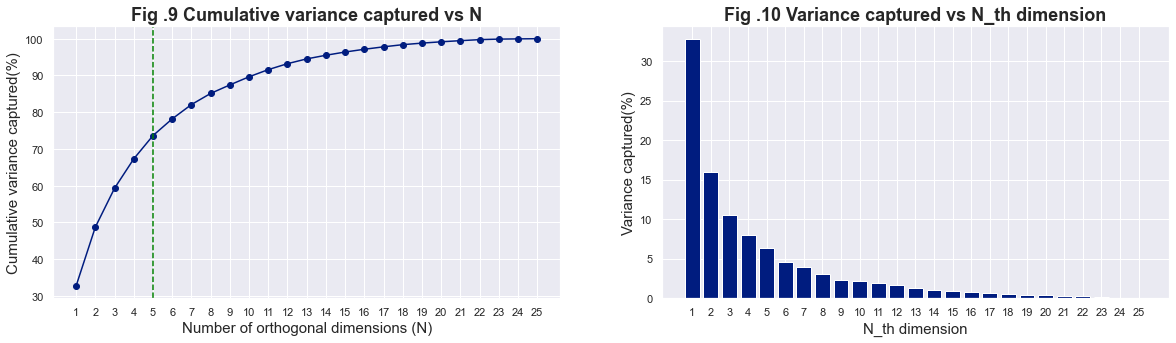

In [75]:
from sklearn.decomposition import PCA #importing PCA from Sklearn
pca = PCA()
pca.fit(np_train) #fitting the training data

variance_per_comp= pca.explained_variance_ratio_ # 
cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
n = np.linspace(1,len(variance_per_comp),len(variance_per_comp))


fig, axes = plt.subplots(1,2,figsize = (20,5))
plt.grid(visible = True)

axes[0].plot(n,cum_var,marker='o')
axes[1].bar(n,variance_per_comp*100)
axes[0].axvline(5,color="green",linestyle='--')

plt.style.use('seaborn-dark-palette')
axes[0].set_title("Fig .9 Cumulative variance captured vs N", size = 18, fontweight = 'bold')
axes[0].set_ylabel("Cumulative variance captured(%)",size = 15)
axes[0].set_xlabel("Number of orthogonal dimensions (N)",size = 15)
for ax in axes:
    ax.set_xticks(n)
axes[1].set_title("Fig .10 Variance captured vs N_th dimension", size = 18, fontweight = 'bold')
axes[1].set_ylabel("Variance captured(%)", size = 15)
axes[1].set_xlabel("N_th dimension", size = 15)
plt.show()

First five orthogonal principal dimensions were considered for predictive modeling. Let these dimension be named as **D1**, **D2**, **D3**, **D4**, **D5**. An orthogonal projection of the training data on **D1-D2** plane is visualised in **Fig.11**. 

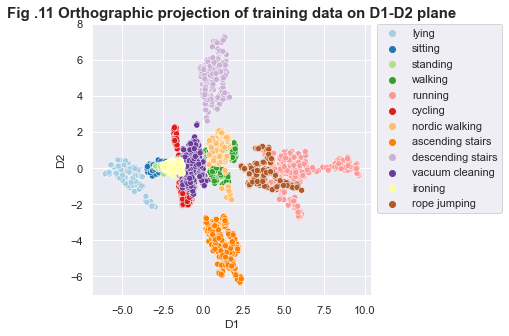

In [35]:
import sklearn.decomposition as decomp
import seaborn as sns

pca = decomp.PCA(n_components = 5)
pca.fit(np_train)
principal_array_train = pca.fit_transform(np_train)

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(principal_array_train[:,0],principal_array_train[:,1],
                hue= df_TRAIN['activity'],palette='Paired',ax=ax)
plt.title("Fig .11 Orthographic projection of training data on D1-D2 plane", size = 15, fontweight = 'bold')
plt.xlabel('D1')
plt.ylabel('D2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<font size="4">**7.2. K-means clustering**
 
Unsupervised learning techniques, such as K-means clustering, are a suitable choice for this clustering problem because the ground truth labels are known. Number of clusters required is known, which is **12** as shown in **Fig. 11**. Since K-means is an unsupervised model, it is not necessary to split the data into training and test sets. This is so because the main goal of unsupervised learning is to discover patterns or structure in the data rather than making predictions on unseen data. We can use the clustering made by the K-means model on the training data and compare them to the ground truth labels using an evaluation metric like the adjusted Rand index to assess the accuracy of the model.
    
The clustering algorithm was repeated 100 times, each time with a randomly initialized set of clusters. For each clustering, the adjusted Rand index (ARI) score was calculated as a measure of similarity between the predicted clusters and the true labels (activity names). The clustering with the highest ARI score was then chosen as the final solution.
    
Some visual similarity can be seen between the ground truth and the predicted clusters (**Fig. 12**).Activities such as ascending stairs, descending stairs, and running are clearly distinguishable from each other. However, the model struggled to distinguish between nordic walking and walking, as these activities are very similar.

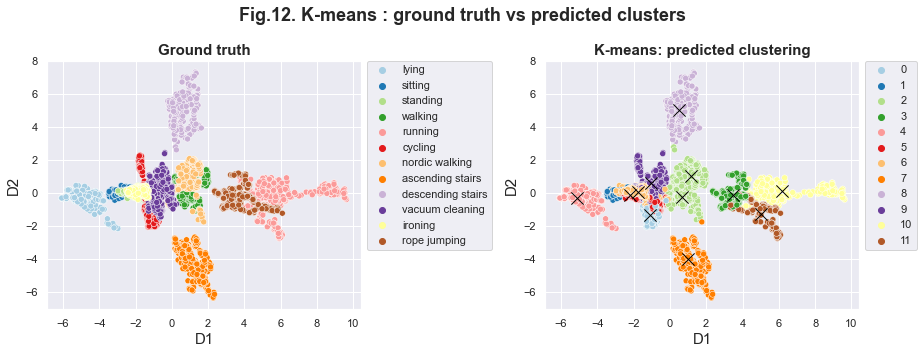

In [84]:
from sklearn import cluster

true_labels = df_TRAIN['activity']
learned_labels_K5 = []
ARIs = []
for _ in range(100):  # seeding is performed 100 times randomly
    cl_K5 = cluster.KMeans(init='random',n_clusters=12)
    cl_K5.fit(principal_array_train)
    pred = cl_K5.predict(principal_array_train) #clustering is done here 
    learned_labels_K5.append(pred) # each prediction is appended into a list
    ARIs.append(adjusted_rand_score(true_labels,pred)) # corresponding ARIs are appended into another list
    
max_index = ARIs.index(max(ARIs)) # Index of maximum ARI is obtained here

fig, axes = plt.subplots(1,2,figsize=(13,5))
sns.scatterplot(principal_array_train[:,0],principal_array_train[:,1],
                hue= df_TRAIN['activity'],palette='Paired',ax=axes[0])
sns.scatterplot(principal_array_train[:,0],principal_array_train[:,1],
                hue= learned_labels_K5[max_index],palette='Paired',ax=axes[1]) # plotting clustering of maximum similarity
sns.scatterplot(cl_K5.cluster_centers_[:,0],cl_K5.cluster_centers_[:,1],
                marker = 'x',ax=axes[1],s=150,color='black')

axes[0].set_title("Ground truth", size = 15, fontweight = 'bold')
axes[1].set_title("K-means: predicted clustering", size = 15, fontweight = 'bold')
plt.suptitle('Fig.12. K-means : ground truth vs predicted clusters',
             size = 18, fontweight = 'bold')
axes[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for ax in axes:
    ax.set_xlabel('D1',size = 15)
    ax.set_ylabel('D2',size = 15)
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# set the spacing between subplots
fig.tight_layout()

sns.set_theme()

In [86]:
from sklearn.metrics.cluster import adjusted_rand_score,rand_score
from sklearn.metrics import silhouette_score

true_labels = df_TRAIN['activity']
aRS_3=adjusted_rand_score(true_labels,learned_labels_K5[max_index])
Rs = rand_score(true_labels,learned_labels_K5[max_index])
Ss = silhouette_score(principal_array_train, learned_labels_K5[max_index])
print('Adjusted Rand Score = ', round(aRS_3,2))
print('Rand Score = ', round(Rs,2))
print('Silhouette_score = ', round(Ss,2))

Adjusted Rand Score =  0.64
Rand Score =  0.94
Silhouette_score =  0.43


The K-means clustering algorithm produced a predicted clustering that has an adjusted Rand index (ARI) of **0.64**, indicating a moderate level of similarity to the ground truth. The silhouette score for this clustering was **0.43**, which may suggest some overlap between the clusters. Based on these evaluation metrics, the K-means clustering appears to be moderately effective at making predictions, but there may be room for improvement in terms of compactness and separation of the clusters.

## **8. Summary**  <a class="anchor"  id="8"></a>
 
The aim of this study was to investigate the correlation between body movements and the type of physical activity being performed using the Physical Activity Monitoring dataset. Exploratory Data Analysis revealed that heart rate can be used to differentiate between low, moderate, and high intensity activities. Temperature data demonstrated some visual separation between outdoor and indoor activities, but this difference was not statistically significant according to the hypothesis testing results. Angular velocity was found to be effective in distinguishing between activities of similar intensity, such as running and rope jumping or walking and cycling. The directional nature of acceleration as a vector was found to be statistically significant in distinguishing between low intensity activities like sitting and standing.
    
The results of EDA and hypothesis testing led to the identification of parameters relevant for distinguishing between physical activities. These parameters were then used in a principal component analysis (PCA), which showed that the first five principal directions captured more than 70% of the variance in the data. K-means clustering was used to group the data into clusters, and the clustering solution with the highest similarity to the true labels (as measured by the adjusted Rand index or ARI score) was chosen as the final solution. This solution had an ARI score of 0.64, indicating a moderate level of similarity with the ground truth. However, the silhouette score of 0.43 suggested that there was room for improvement in terms of inter-cluster distances. The developed model proves to be good at separating activities such as running, ascending stairs, descending stairs, lying and ironing. The model couldn't distinguish activities like nordic walking and walking, with very subtle differences in body movements.
    
    
<font size="4">**8.1. Scope for further research**
  
* Investigating the use of other machine learning algorithms, such as decision trees or support vector machines, to see if they yield better performance in distinguishing between different types of physical activity.

* Examining the potential for using the model to classify additional types of physical activity beyond those included in the Physical Activity Monitoring dataset.

* Evaluating the performance of the model in a real-world setting, such as by testing it on a new dataset collected from a diverse group of individuals engaging in various types of physical activity.

* Exploring the use of additional sensors or data sources to enhance the model's ability to accurately classify different types of physical activity.

* Conducting further analysis to better understand the factors that contribute to the model's performance, such as the role of heart rate, temperature, angular velocity, and acceleration in distinguishing between different types of physical activity.
    

## **9. References**
 
    [1] Radovanov, B. & Marcikic, A. 2014, "A comparison of four different block bootstrap methods", Croatian Operational Research Review, vol. 5, no. 2, pp. 189-202.